# Data Project 1 - Exploratory analysis of Federal Reserve district data

By Charlie Smith, University of South Alabama, Fall 2023, BUS 798

## Part 1 - Measures of Central Tendency

### 1.1 - Word Counts

The first part of this analysis is on the textual data contained in Federal Reserve Beige Books. I perform summary statistics on the word counts in the Beige Books.

In [1]:
# Importing pandas for numerical variable analysis and os, numpy, string, and nltk for text variable analysis.

import pandas as pd
import os as os
import numpy as np
import string as string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\MCOB PHD
[nltk_data]     14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Setting the directory where the text files of the Beige Books are stored
directory_path = "C:/Users/MCOB PHD 14/Dropbox/Charlie's Dissertation/Beige Books"

# Creating an empty list where the loop in the next step will save the Beige Book text files one by one
text_data = []

In [3]:
# Loop through the files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            text_data.append(file.read())

In [4]:
# Empty list to store word counts
word_counts = []

# Tokenize and count words in each document
for document in text_data:
    tokens = nltk.word_tokenize(document)
    word_count = (len(tokens))
    word_counts.append(word_count)


In [5]:
# Saving the word_counts list as object as a dataframe so I can analyze it using Pandas
wordsDF = pd.DataFrame(word_counts, columns = ['Word_Count'])
wordsDF.describe()

,Word_Count
count,6014.000000
mean,1100.882607
std,356.346939
min,15.000000
25%,857.000000
50%,1036.000000
75%,1293.000000
max,4134.000000


Notes:
- There are 6,014 observations (region-month-year) of the Beige Books.
- The mean word count of 1,100 indicates the documents are potentially of sufficient length to drill down for sub-analyses of specific sectors or economic events.
- The minimum word count of 15 is a document that says something like: "The report for this district this month is not available."

### 1.2 IV - Beige Book Sentiment

Now we need to calculate a sentiment score for each Beige Book.

In [6]:
# Import the nltk vader package for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [7]:
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# Going to test the sentiment analyzer on one document.
# Document 4,400 is the Beige Book from Atlanta in December 2008 and was extremely negative sentiment during the Great Recession.
document = text_data[4400]
text_data[4400]

"December 3, 2008 \nEconomic conditions in the Sixth District weakened further in October through mid-November. Retail spending deteriorated, holiday sales expectations were bleak, and activity in the tourism sector declined. Residential real estate contacts indicated that sales and construction activity remained extremely weak.  Average home prices in many areas declined, pressured by the large number of foreclosed properties for sale.  Commercial contractors noted a further decline in nonresidential construction. Most manufacturing contacts noted reduced production and declines in new orders.  Credit conditions remained tight for both businesses and consumers. Labor markets weakened further and holiday-related hiring plans were restrained. Cost pressures for businesses eased on declining commodity prices and weaker demand.\nConsumer Spending and Tourism  \nDistrict retail contacts indicated that they were more pessimistic in October and early November than in the previous report. Whi

In [9]:
# Perform sentiment analysis to test if it catches onto the negative tone of the text.
sentiment_scores = analyzer.polarity_scores(document)

# Interpret the sentiment scores
compound_score = sentiment_scores['compound']

if compound_score >= 0.05:
    sentiment = 'Positive'
elif compound_score <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print("Sentiment:", sentiment)
print("Compound Score:", compound_score)


Sentiment: Negative
Compound Score: -0.9442


In [10]:
# It worked!
# We're going to try another text that we know had positive sentiment.

# Document 3,100 is the Beige Book from Minneapolis on June 21, 1995, during the long 1990s economic expansion.
document2 = text_data[3100]
text_data[3100]

'June 21, 1995\nThe Ninth District economy shows few signs of slackening from the \nbrisk pace reported previously. Manufacturing is strong. Oil \ndrilling is experiencing a resurgence, mines are looking for ways to \nexpand output and paper mills are running full out. The construction \nsector as a whole is robust, with commercial and heavy building \nprojects more than offsetting declines in residential work. General \nmerchandise sales are improved from earlier in the year. Vehicle \nsales remain below year-earlier levels, but some sources note an \nupturn in sales. Employment growth remains robust and employers \nreport continuing problems in finding employees. Few substantial \nwage or price increases are reported other than for paper products \nand some industrial inputs.\nAdverse weather is responsible for problems in two sectors. Excess \nrainfall and cool weather severely delayed planting in many areas. \nSome loss of potential yield appears likely, particularly in the \nDakot

In [11]:
# Perform sentiment analysis to test if it catches onto the positive tone of the text.
sentiment_scores = analyzer.polarity_scores(document2)

# Interpret the sentiment scores
compound_score = sentiment_scores['compound']

if compound_score >= 0.05:
    sentiment = 'Positive'
elif compound_score <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print("Sentiment:", sentiment)
print("Compound Score:", compound_score)

Sentiment: Positive
Compound Score: 0.9981


Having some confidence now this method can meaningfully capture the sentiment of a Beige Book, we now run it on the full population.

In [12]:
# Earlier I read in the Beige Books texts as a list
    # Now doing it as a dataframe
    # Also including the filename so we can know which region, month, and year it's from

# Setting the directory where the text files of the Beige Books are stored
directory_path = "C:/Users/MCOB PHD 14/Dropbox/Charlie's Dissertation/Beige Books"

# Create empty lists to store text and file names
textDF = []
file_names = []

# Loop through the files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            # Append the text to the text_data list
            textDF.append(file.read())
            # Append the file name to the file_names list
            file_names.append(filename)

# Create a DataFrame from the text and file_names lists
data = {'text': textDF, 'file_name': file_names}
BeigeBookDF = pd.DataFrame(data)

In [13]:
# Create the function and run it on the Beige Book dataframe
def analyze_sentiment(BeigeBookDF):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(BeigeBookDF)
    
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        sentiment = 'positive'
    elif compound_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    return compound_score, sentiment

BeigeBookDF['compound_score'], BeigeBookDF['sentiment'] = zip(*BeigeBookDF['text'].apply(analyze_sentiment))


In [14]:
BeigeBookDF.describe()

,compound_score
count,6014.000000
mean,0.823395
std,0.504898
min,-0.998400
25%,0.977800
50%,0.995100
75%,0.998000
max,0.999900


The sentiment score seems to be extreme: Either really low or really high (the possible range is -1 to 1).

There are many methods and tools for calculating sentiment. Vader may not be best for business documents because it's intended for less formal communication like social media.

So certainly I will need to explore other sentiment classifiers. But this will do for now to at least give us a score to work with.

### 1.3 DV - Macroeconomic index score

A monthly macroeconomic index for each Fed district was calculated based on the Philadelphia Fed's coincident index. Then the U.S. index was subtracted from this value to remove, at least partially, the national trends from the regional ones. These values represent the difference between each district and the national level.

A negative value indicates economic conditions were worse than the nation as a whole, while a positive value indicates district economic conditions were better than the national level.

In [15]:
# Reading in the data
districtDiffs = pd.read_csv('district_diffs.csv', encoding='latin1')
districtDiffs.head()

,Date,USPHCI,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12
0,4/1/1979,46.14,0.22,9.92,11.87,16.25,-0.15,-2.42,15.90,11.08,4.86,3.98,-5.66,-5.63
1,5/1/1979,46.37,0.22,9.82,11.79,16.14,-0.24,-2.51,15.80,10.93,4.79,3.90,-5.73,-5.70
2,6/1/1979,46.50,0.30,9.79,11.79,16.09,-0.27,-2.53,15.70,10.83,4.76,3.86,-5.71,-5.65
3,7/1/1979,46.62,0.28,9.66,11.69,15.90,-0.29,-2.62,15.49,10.62,4.65,3.81,-5.67,-5.62
4,8/1/1979,46.68,0.43,9.67,11.62,15.83,-0.32,-2.54,15.23,10.52,4.59,3.83,-5.57,-5.60


In [16]:
# Want to calculate overall mean for the combined districts
# Select the columns you want to include in the mean calculation
district_columns = ['District 1', 'District 2', 'District 3', 'District 4', 'District 5', 'District 6', 'District 7', 'District 8', 'District 9', 'District 10', 'District 11', 'District 12']

# Calculate the overall summary statistics
dv_mean = districtDiffs[district_columns].mean().mean()
dv_median = districtDiffs[district_columns].median().median()
    # Mode omitted because it's not really meaningful to calculate the mode of a continuous variable like this.


# Print the overall mean
print("DV Mean:", dv_mean)
print("DV Median:", dv_median)


DV Mean: 2.0042464040025005
DV Median: 0.985


## Part 2 - Descriptive Statistics on Units of Analysis

### 2.1 - Merging datasets

In [17]:
# Changing the Date variable to read as a datetime
districtDiffs['Date'] = pd.to_datetime(districtDiffs['Date'])

In [18]:
# Reshape districtDiffs dataframe from wide to long
districtLong = pd.melt(districtDiffs, id_vars=["Date", "USPHCI"], var_name="District", value_name="Value")

# Extract the numeric part from the "District" names and convert to integers
districtLong["District"] = districtLong["District"].str.extract(r'(\d+)').astype(int)

# Sort the DataFrame by "Date" and "District" columns
districtLong = districtLong.sort_values(by=["Date", "District"])

# Reset the index
districtLong.reset_index(drop=True, inplace=True)

# Display the long-format DataFrame
print(districtLong)


           Date  USPHCI  District  Value
0    1979-04-01   46.14         1   0.22
1    1979-04-01   46.14         2   9.92
2    1979-04-01   46.14         3  11.87
3    1979-04-01   46.14         4  16.25
4    1979-04-01   46.14         5  -0.15
...         ...     ...       ...    ...
6391 2023-08-01  138.76         8  -1.86
6392 2023-08-01  138.76         9   9.02
6393 2023-08-01  138.76        10   7.18
6394 2023-08-01  138.76        11  23.24
6395 2023-08-01  138.76        12  23.50

[6396 rows x 4 columns]


In [19]:
# Define a mapping of city abbreviations to district numbers
city_to_district = {
    "bo": 1,
    "ny": 2,
    "ph": 3,
    "cl": 4,
    "ri": 5,
    "at": 6,
    "ch": 7,
    "sl": 8,
    "mn": 9,
    "kc": 10,
    "da": 11,
    "sf": 12,
}

# Define a mapping of month codes (as named in the original text files of the Beige Books) to month names
month_to_name = {
    "1": "December",
    "2": "October",
    "3": "September",
    "4": "July",
    "5": "June",
    "6": "May",
    "7": "March",
    "8": "January",
}

# Define a mapping of month names to month numbers
name_to_month_numerical = {
    "December": "12",
    "October": "10",
    "September": "09",
    "July": "07",
    "June": "06",
    "May": "05",
    "March": "03",
    "January": "01",
}


In [20]:
# Create a new dataframe that is a copy of BeigeBookDF
bbDF = BeigeBookDF

# Extract the year, city, and month code into separate columns
bbDF[['Year', 'City', 'MonthCode']] = BeigeBookDF['file_name'].str.extract(r'(\d{4})_(\w{2}) \((\d)\).txt')

# Map the city abbreviations to district numbers
bbDF['District'] = bbDF['City'].map(city_to_district)

# Map the month code to month names
bbDF['MonthName'] = bbDF['MonthCode'].map(month_to_name)

# Map the month names to numerical month numbers
bbDF['MonthNumerical'] = bbDF['MonthName'].map(name_to_month_numerical)

# Create a new column with the formatted date
bbDF['Date'] = bbDF['Year'] + '-' + BeigeBookDF['MonthNumerical'] + '-01'

In [21]:
# Convert the 'Date' column to a datetime data type
bbDF['Date'] = pd.to_datetime(bbDF['Date'])

In [22]:
# Use the merge function to join the DataFrames based on the 'Date' and 'District' columns
bbMerged = districtLong.merge(bbDF, on=['Date', 'District'])

# Print the resulting DataFrame
print(bbMerged)


           Date  USPHCI  District  Value  \
0    1979-05-01   46.37         1   0.22   
1    1979-05-01   46.37         2   9.82   
2    1979-05-01   46.37         3  11.79   
3    1979-05-01   46.37         4  16.14   
4    1979-05-01   46.37         5  -0.24   
...         ...     ...       ...    ...   
4237 2023-06-01  138.24         8  -1.41   
4238 2023-06-01  138.24         9   9.65   
4239 2023-06-01  138.24        10   7.46   
4240 2023-06-01  138.24        11  22.99   
4241 2023-06-01  138.24        12  23.25   

                                                   text        file_name  \
0      May 16, 1979\nBusiness activity in the First ...  1979_bo (6).txt   
1      May 16, 1979 \nSecond District business activ...  1979_ny (6).txt   
2      May 16, 1979 \nThird District economic activi...  1979_ph (6).txt   
3      May 16, 1979 \nManufacturing activity in the ...  1979_cl (6).txt   
4      May 16, 1979 \nMost indications are that Fift...  1979_ri (6).txt   
...            

In [23]:
# Going to rename the Value column and drop the 'FormattedDate' column

bbMerged = bbMerged.rename(columns={'Value': 'econ_index'})

In [24]:
# Range of monthly observations
min_month_year = bbMerged['Date'].min()
max_month_year = bbMerged['Date'].max()
print('First month in dataset:',min_month_year)
print('Last month in dataset:',max_month_year)

First month in dataset: 1979-05-01 00:00:00
Last month in dataset: 2023-06-01 00:00:00


Notes:
1. Dates now range from May 1979 to June 2023.
2. Lost some observations because the economic index data only starts in April 1979 vs. 1970 for Beige Books.
3. This loss is acceptable because it's at the beginning of the period, when the economy was very different than what it is today.
4. Also, we still have plenty of observations to work with: 4,230

In [25]:
# Going to calculate the average score by date

# Group the DataFrame by "Date" and calculate the mean for each group

grouped_data = bbMerged.groupby('District')['econ_index'].describe()
print(grouped_data)

          count      mean       std    min     25%    50%      75%    max
District                                                                 
1         352.0  1.938835  5.053444 -12.24 -0.8525  0.315   3.1825  18.14
2         354.0  2.546695  5.237715 -20.98 -0.8250  0.805   8.1750  11.54
3         353.0  2.228385  6.222225 -18.44 -3.0400  1.900   7.7200  11.79
4         354.0  3.932627  6.678119 -15.99 -2.2675  5.005  10.0425  16.14
5         354.0  0.809153  3.345896  -3.15 -1.2200 -0.480   1.4725  11.34
6         354.0  0.036299  4.699060  -3.99 -2.7900 -2.220   0.5075  14.65
7         354.0  3.906780  6.571178 -19.63 -2.3425  4.795  10.0425  15.80
8         353.0  3.041530  3.772731  -6.99 -0.5300  2.140   6.5200  10.93
9         354.0  2.654689  3.029284  -8.35  0.7700  1.940   3.9025  12.11
10        353.0  1.808895  2.492047  -1.82 -0.3300  1.170   3.6900   8.69
11        354.0  1.364887  8.659141  -8.00 -5.0200 -3.050   9.1125  22.99
12        353.0 -0.404419  8.444640  -

Notes:
- The count shows we're missing some observations for some districts.
- I have a list of Beige Books that are missing from the original source.
- All districts have a positive economic index, relative to the national average, except District 12 (San Francisco).
- A higher standard deviation implies more economic fluctuations in that district.
 

In [26]:
count_year = bbMerged['Year'].value_counts()

count_district = bbMerged['City'].value_counts()

print(count_year)
print(count_district)

2001    96
2011    96
2003    96
2004    96
2005    96
2006    96
2007    96
2008    96
2009    96
2010    96
2012    96
1980    96
2013    96
2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2002    96
2000    96
2022    96
1991    96
1982    96
1984    96
1985    96
1987    96
1989    96
1999    96
1990    96
1992    96
1993    96
1994    96
1995    96
1996    96
1997    96
1998    96
2021    96
1988    95
1986    95
1983    95
1981    93
1979    72
2023    48
Name: Year, dtype: int64
ny    354
cl    354
ri    354
at    354
ch    354
mn    354
da    354
ph    353
sl    353
kc    353
sf    353
bo    352
Name: City, dtype: int64


In [27]:
# City counts per year
city_year_counts = bbMerged.groupby(['Year', 'City']).size().reset_index(name='Count')

# Print the resulting DataFrame with city counts by year
print(city_year_counts)

     Year City  Count
0    1979   at      6
1    1979   bo      6
2    1979   ch      6
3    1979   cl      6
4    1979   da      6
..    ...  ...    ...
535  2023   ny      4
536  2023   ph      4
537  2023   ri      4
538  2023   sf      4
539  2023   sl      4

[540 rows x 3 columns]


## Part 3 - Data Visualization

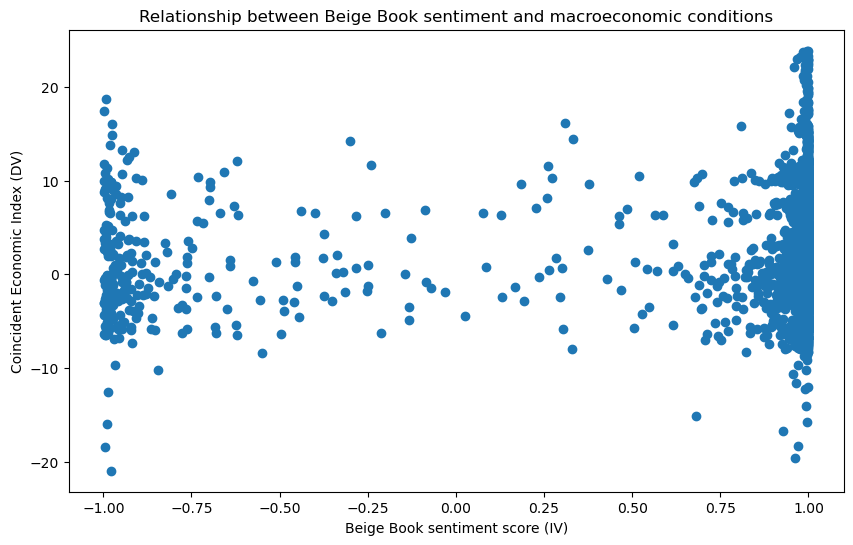

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(bbMerged['compound_score'], bbMerged['econ_index'])
plt.title('Relationship between Beige Book sentiment and macroeconomic conditions')
plt.xlabel('Beige Book sentiment score (IV)')
plt.ylabel('Coincident Economic Index (DV)')
plt.show()

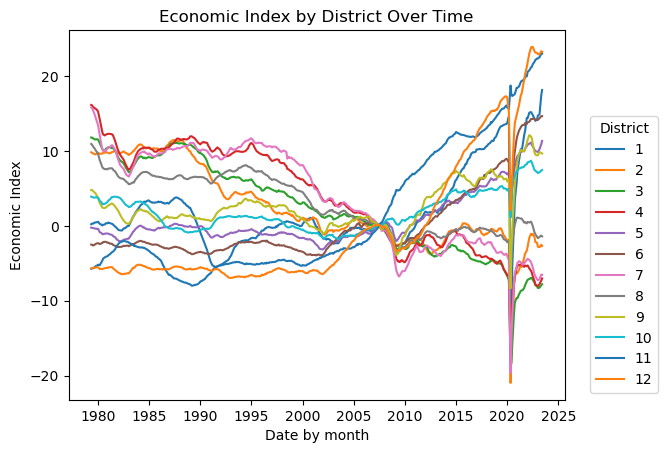

In [78]:
# Group the data by 'District'
grouped = bbMerged.groupby('District')

# Create a line plot for each group
for name, group in grouped:
    plt.plot(group['Date'], group['econ_index'], label=name)

# Add labels and a legend
plt.xlabel('Date by month')
plt.ylabel('Economic Index')
plt.title('Economic Index by District Over Time')
#plt.xticks(range(1, 45 + 1, 5), rotation=45)
plt.legend(title='District', loc='lower center', bbox_to_anchor=(1.12, 0), ncol=1)
# Show the plot
plt.show()


Notes
- I know that the level of the coincident index rises with the GDP of each district. I think that is what is causing the convergence around 2008.
- Need to investigate this further. Probably need to factor in that GDP growth when making the variable.

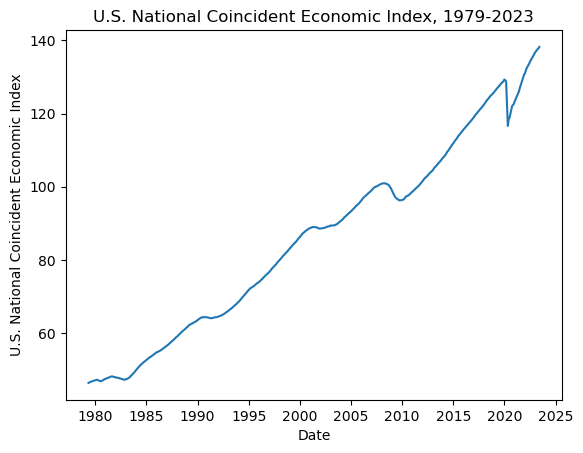

In [83]:
# Plotting the national level of the index over time
plt.plot(bbMerged['Date'], bbMerged['USPHCI'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('U.S. National Coincident Economic Index')
plt.title('U.S. National Coincident Economic Index, 1979-2023')

# Show the plot
plt.show()


Notes:
- Need to check how sentiment score is created
- Need to check how differences from national index are influenced by GDP growth